# 6.4: KLM Report

## Part 1: Estimate task completion time for tasks

### Tasks:

* Task 1: adding the numbers from 1 to 20 using only the mouse

* Task 2: adding the numbers from 1 to 20 using only the keyboard

* Task 3: calculating the result of (3² + 4²) ∗ 15.2 using only the mouse

* Task 4: calculating the result of (3² + 4²) ∗ 15.2 using only the keyboard

###### Assumptions:
the calculator is already opened and focused and the user's hand is already on the correct input device for the first action (either mouse or keyboard)

In [1]:
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [2]:
# import the klm calculator
from klm import calculate_klm

In [3]:
# specify the files with klm operators for each task

file_task1 = "./klm_tasks/task1.txt"
file_task2 = "./klm_tasks/task2.txt"
file_task3 = "./klm_tasks/task3.txt"
file_task4 = "./klm_tasks/task4.txt"

In [4]:
# and calculate their task completion times with the imported function
task_completion_times = dict()

for task_number, task_file in enumerate([file_task1, file_task2, file_task3, file_task4], start=1):
    print(f"\nPredicted task completion time for task {task_number}:")
    times = calculate_klm(task_file)
    task_completion_times[task_number] = times

# print(task_completion_times)


Predicted task completion time for task 1:
Input operators were: PBBPBB16P32BPBBPBBPBB30P60B
Predicted task completion time for the given operators using custom klm values: 0.000 seconds.
Predicted task completion time for the given operators using default klm values: 66.300 seconds.
(66.30000000000001, 0.0)

Predicted task completion time for task 2:
Input operators were: 18K27KKKKK
Predicted task completion time for the given operators using custom klm values: 0.000 seconds.
Predicted task completion time for the given operators using default klm values: 9.800 seconds.
(9.799999999999997, 0.0)

Predicted task completion time for task 3:
Input operators were: PBB7P14BPBB5P10BPBB
Predicted task completion time for the given operators using custom klm values: 0.000 seconds.
Predicted task completion time for the given operators using default klm values: 19.500 seconds.
(19.500000000000007, 0.0)

Predicted task completion time for task 4:
Input operators were: 2K4KK4K2K6K2K
Predicted ta

## Part 2: KLM Experiment

### Experiment Design
TODO

### Participants
TODO

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
# TODO read in actual task completion times in the experiment
#  -> fake it for now
actual_times = {1: (54.2), 2: 10.3, 3: 20.7, 4: 5.5}

In [51]:
# Create a pandas dataframe with the task completion times
times_df = pd.DataFrame.from_dict(task_completion_times, orient='index', 
                                  columns=['task_time_default_in_s', 'task_time_custom_in_s']).reset_index()
times_df.rename(columns={times_df.columns[0]:'task_id'}, inplace = True)
times_df.head()

,task_id,task_time_default_in_s,task_time_custom_in_s
0,1,66.3,0.0
1,2,9.8,0.0
2,3,19.5,0.0
3,4,4.2,0.0


In [53]:
# add the actual task completion times
# times_df['task_time_actual_in_s'] = actual_times
# times_df.head()
actual_times_df = pd.DataFrame.from_dict(actual_times, orient='index', columns=['task_time_actual_in_s']).reset_index()
actual_times_df.rename(columns={actual_times_df.columns[0]:'task_id'}, inplace = True)
actual_times_df

,task_id,task_time_actual_in_s
0,1,54.2
1,2,10.3
2,3,20.7
3,4,5.5


In [61]:
merged_df = times_df.merge(actual_times_df, on="task_id")
merged_df

,task_id,task_time_default_in_s,task_time_custom_in_s,task_time_actual_in_s
0,1,66.3,0.0,54.2
1,2,9.8,0.0,10.3
2,3,19.5,0.0,20.7
3,4,4.2,0.0,5.5


In [55]:
# pd.concat([times_df, actual_times_df], axis=1, join="inner", ignore_index=True)

In [65]:
# tODO daten ins wide format mit melt bringen ? (die 3 zeiten!!)
renamed_df = merged_df.rename(columns={'task_time_default_in_s': 'klm_default', 'task_time_custom_in_s': 'klm_custom', 'task_time_actual_in_s': 'klm_actual'})
merged_df_long = pd.melt(renamed_df, id_vars=['task_id'], 
                         value_vars=['klm_default', 'klm_custom', 'klm_actual'], 
                         var_name='time_type', value_name='time_in_s')
merged_df_long

,task_id,time_type,time_in_s
0,1,klm_default,66.3
1,2,klm_default,9.8
2,3,klm_default,19.5
3,4,klm_default,4.2
4,1,klm_custom,0.0
5,2,klm_custom,0.0
6,3,klm_custom,0.0
7,4,klm_custom,0.0
8,1,klm_actual,54.2
9,2,klm_actual,10.3


## Visualizations
Comparison of the two estimates for each task with the actual task completion times

In [92]:
# try useful splits

task_1 = merged_df_long[merged_df_long['task_id'] == 1]
display(task_1)

time_actual = merged_df_long[merged_df_long['time_type'] == "klm_actual"]
display(time_actual)

task_1_times_actual = merged_df_long[(merged_df_long['task_id'] == 1) & (merged_df_long['time_type'] == "klm_actual")]
task_1_times_actual

,task_id,time_type,time_in_s
0,1,klm_default,66.3
4,1,klm_custom,0.0
8,1,klm_actual,54.2


,task_id,time_type,time_in_s
8,1,klm_actual,54.2
9,2,klm_actual,10.3
10,3,klm_actual,20.7
11,4,klm_actual,5.5


,task_id,time_type,time_in_s
8,1,klm_actual,54.2


<AxesSubplot:xlabel='time_type', ylabel='time_in_s'>

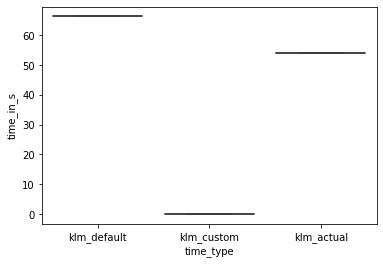

In [87]:
sns.boxplot(data=task_1, x="time_type", y="time_in_s")
# sollte besser werden mit mehr daten...

<AxesSubplot:xlabel='time_type', ylabel='time_in_s'>

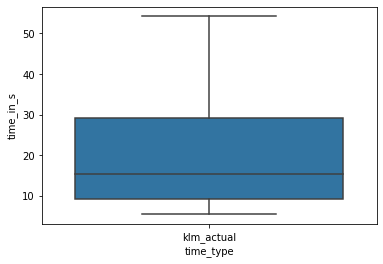

In [88]:
sns.boxplot(data=time_actual, x="time_type", y="time_in_s")
# todo nebendran für die anderen beiden types auch noch?  -> vergleich der 3 timetypes (per task and overall?)

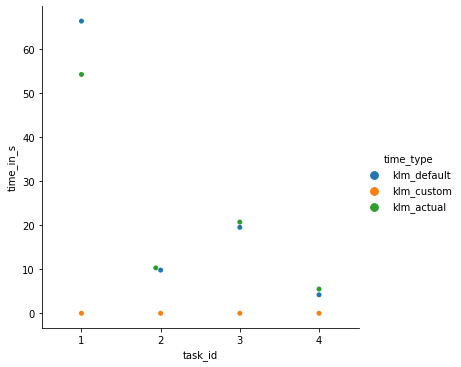

In [108]:
sns.catplot(x="task_id", y="time_in_s", hue="time_type", kind="swarm", data=merged_df_long)

<AxesSubplot:xlabel='task_id', ylabel='time_in_s'>

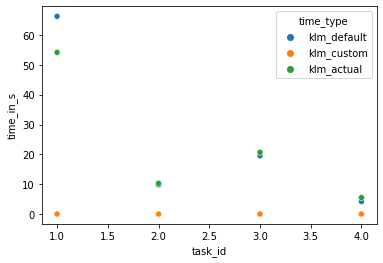

In [91]:
sns.scatterplot(x="task_id", y="time_in_s", hue="time_type", data=merged_df_long)

<AxesSubplot:xlabel='time_type', ylabel='time_in_s'>

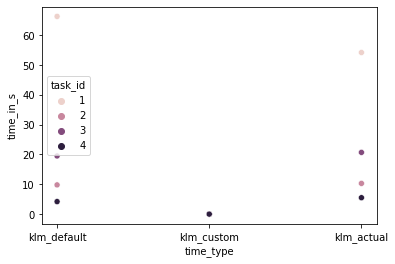

In [120]:
sns.scatterplot(x="time_type", y="time_in_s", hue="task_id", data=merged_df_long)

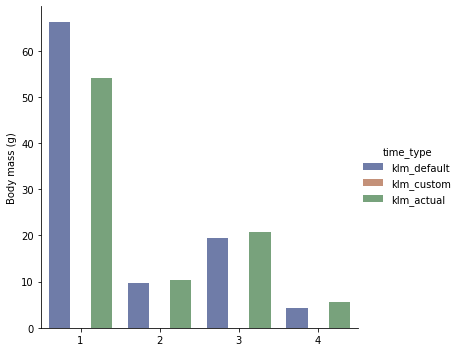

In [119]:
plot = sns.catplot(x="task_id", y="time_in_s", hue="time_type", kind="bar", palette="dark", 
            alpha=.6, data=merged_df_long)
plot.set_axis_labels("", "Body mass (g)")
# plot.legend.set_title("Estimated time in seconds per task")

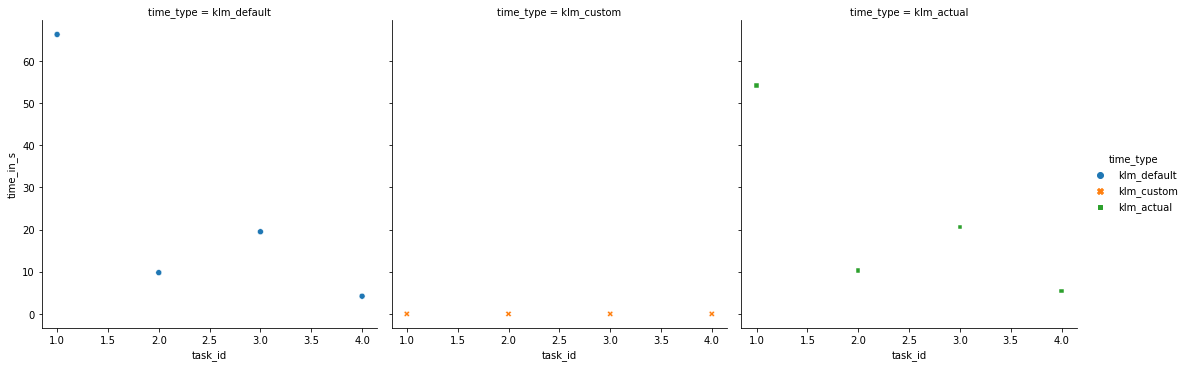

In [110]:
sns.relplot(
    data=merged_df_long,
    x="task_id", y="time_in_s", hue="time_type",
    col="time_type", style="time_type",
)

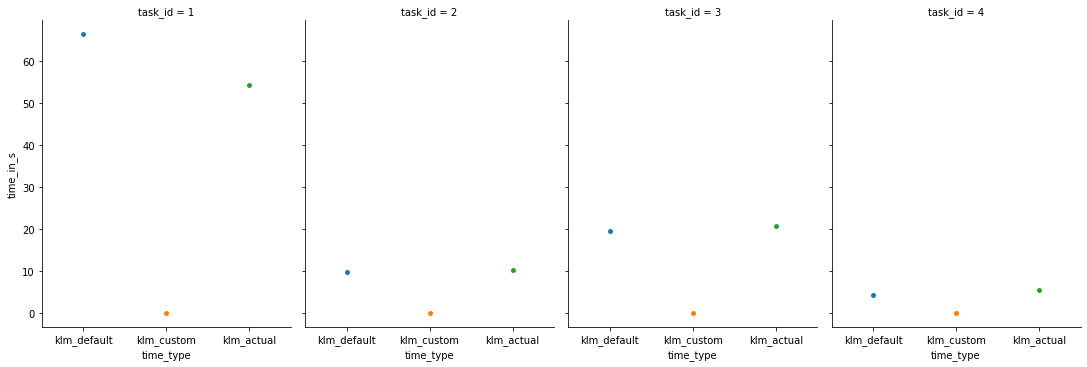

In [129]:
sns.catplot(data=merged_df_long,
            x="time_type", y="time_in_s", hue="time_type",
            col="task_id", aspect=.75,
            kind="swarm")

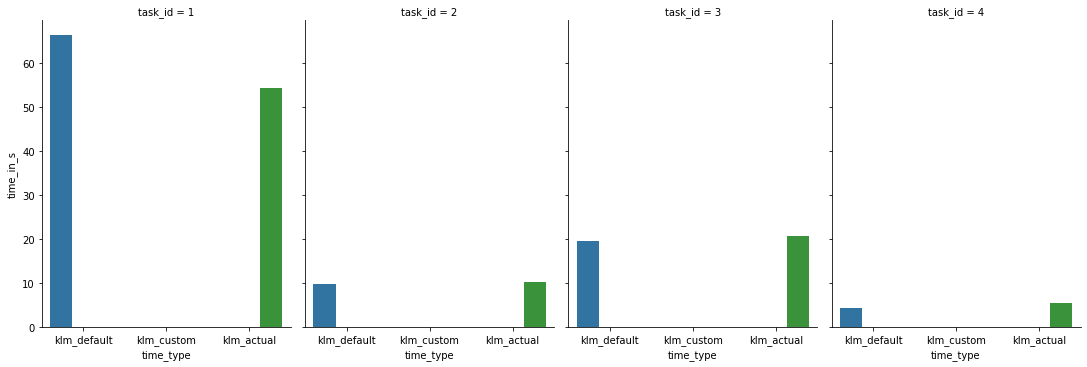

In [148]:
sns.catplot(data=merged_df_long,
            x="time_type", y="time_in_s", hue="time_type",
            col="task_id", aspect=.75, ci=None,
            kind="bar")

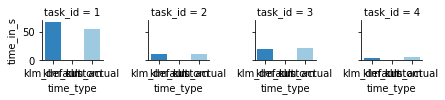

In [144]:
grid = sns.FacetGrid(merged_df_long, col="task_id", hue="time_type", palette="tab20c",
                     col_wrap=7, height=1.5)

# Draw a horizontal line to show the starting point
# grid.map(plt.axhline, y=0, ls=":", c=".5")

grid.map(plt.bar, "time_type", "time_in_s")

# Adjust the tick positions and labels
# grid.set(xticks=np.arange(5), yticks=[-3, 3], xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

Text(0.5, 1.0, 'Errors made per participant and condition')

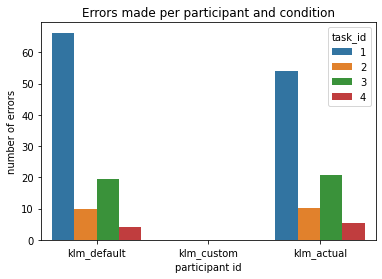

In [116]:
ax = plt.axes()
# sns.barplot(data=merged_df_long, x="time_type", y="time_in_s", hue="time_type", ax = ax, dodge = True)
sns.barplot(data=merged_df_long, x="time_type", y="time_in_s", hue="task_id", ax = ax, dodge = True)
ax.set_xlabel("participant id")
ax.set_ylabel("number of errors")
ax.set_title("Errors made per participant and condition")

Text(0.5, 1.0, 'Time needed per task')

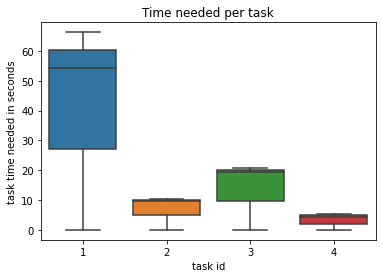

In [73]:
ax = plt.axes()
sns.boxplot(data=merged_df_long, x="task_id", y="time_in_s")
ax.set_xlabel("task id")
ax.set_ylabel("task time needed in seconds")
ax.set_title("Time needed per task")

Text(0.5, 1.0, 'Time needed per klm value type')

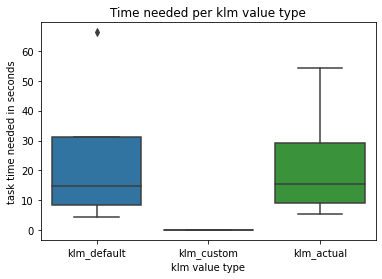

In [83]:
ax = plt.axes()
sns.boxplot(data=merged_df_long, x="time_type", y="time_in_s")
ax.set_xlabel("klm value type")
ax.set_ylabel("task time needed in seconds")
ax.set_title("Time needed per klm value type")

<AxesSubplot:xlabel='task_id', ylabel='time_in_s'>

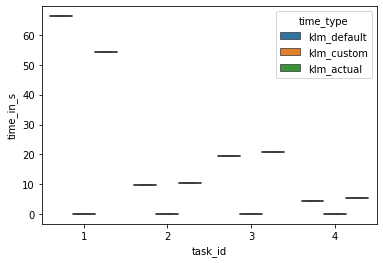

In [114]:
sns.boxplot(x="task_id", y="time_in_s",
            hue="time_type", data=merged_df_long)